<a href="https://colab.research.google.com/github/DJCordhose/buch-machine-learning-notebooks/blob/master/kap2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kapitel 2: Einführung in Machine Learning - Schnelldurchgang

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns

sns.set_theme("notebook", "whitegrid")

In [4]:
import sklearn
print(sklearn.__version__)

1.3.2


## Datensatz Irisblüten
https://de.wikipedia.org/wiki/Portal:Statistik/Datensaetze#Iris

In [5]:
# Importieren von load_iris aus sklearn.dataset
from sklearn.datasets import load_iris

iris = load_iris()

In [6]:
# Zugriff auf iris.DESCR
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
# Daten und Zielvariable als X und y speichern
X = iris.data
y = iris.target

In [8]:
# Ansicht der ersten 10 Einträge von X
X[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [9]:
# shape von X und y
X.shape, y.shape

((150, 4), (150,))

In [10]:
X[0]

array([5.1, 3.5, 1.4, 0.2])

In [11]:
y[0]

0

In [12]:
# einzelne Features aus X extrahieren: sepal_length, sepal_width, petal_length, petal_width
X_sepal_length = X[:, 0]
X_sepal_width =  X[:, 1]
X_petal_length = X[:, 2]
X_petal_width = X[:, 3]

In [13]:
# shape eines Features
X_petal_width.shape

(150,)

In [14]:
# Parameter as_frame von load_iris
data = load_iris(as_frame=True)
X = data["data"]
y = data["target"]

In [15]:
# Ausgabe der Daten X als data frame
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Wir bringen dem Computer bei, Irisblüten zu unterscheiden
http://scikit-learn.org/stable/modules/cross_validation.html

In [16]:
# Importieren von train_test_split aus sklearn.model_selection
from sklearn.model_selection import train_test_split

In [17]:
# Aufteilung der Daten in Training (60%) und Test (40%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

In [18]:
# Überprüfen von shape
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((90, 4), (90,), (60, 4), (60,))

### Wir trainieren einen einfachen KNN Klassifikator und überprüfen die Ergebnisse
http://scikit-learn.org/stable/modules/neighbors.html#classification

In [19]:
# Importieren von KNN aus sklearn.neighbors
from sklearn import neighbors

In [20]:
# Erzeuge Klassifier mit 1 Nachbarn
clf = neighbors.KNeighborsClassifier(1)

In [21]:
# Trainiere Klassifier auf den Trainingsdaten
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [22]:
# Beispielhafte Klassifikation eines Datenbeispiels aus dem Testdatensatz
sample_id = 32
sample_feature = X_test.iloc[sample_id]
sample_label = y_test.iloc[sample_id]

In [23]:
# 
sample_feature

sepal length (cm)    6.1
sepal width (cm)     2.6
petal length (cm)    5.6
petal width (cm)     1.4
Name: 134, dtype: float64

In [24]:
sample_label

2

In [25]:
clf.predict([sample_feature])

array([2])

In [26]:
# Wiederhole Vorhersage für leicht abgeändertes Beispiel
clf.predict([[6.3, 2.7, 5.5, 1.5]]) # slightly different from above, still gives 2

array([2])

In [27]:
# Berechne Score auf dem Trainingsdatensatz
clf.score(X_train, y_train)

1.0

In [28]:
# Berechne Score auf dem Testdatensatz
clf.score(X_test, y_test)

0.95

Um zu versehen, was durch das Training passiert ist, zeichnen wir die Decision Boundaries ein

## Overfitting

In [29]:
# Lege neue Trainings- und Testdaten an mit ausschließlich sepal-Feature
X_train_sepal_only = X_train.filter(like="sepal")
X_test_sepal_only = X_test.filter(like="sepal")

In [30]:
# Trainiere Klassifier mit 1 Nachbarn für neue Daten
clf_sepal = neighbors.KNeighborsClassifier(1)
clf_sepal.fit(X_train_sepal_only, y_train)

KNeighborsClassifier(n_neighbors=1)

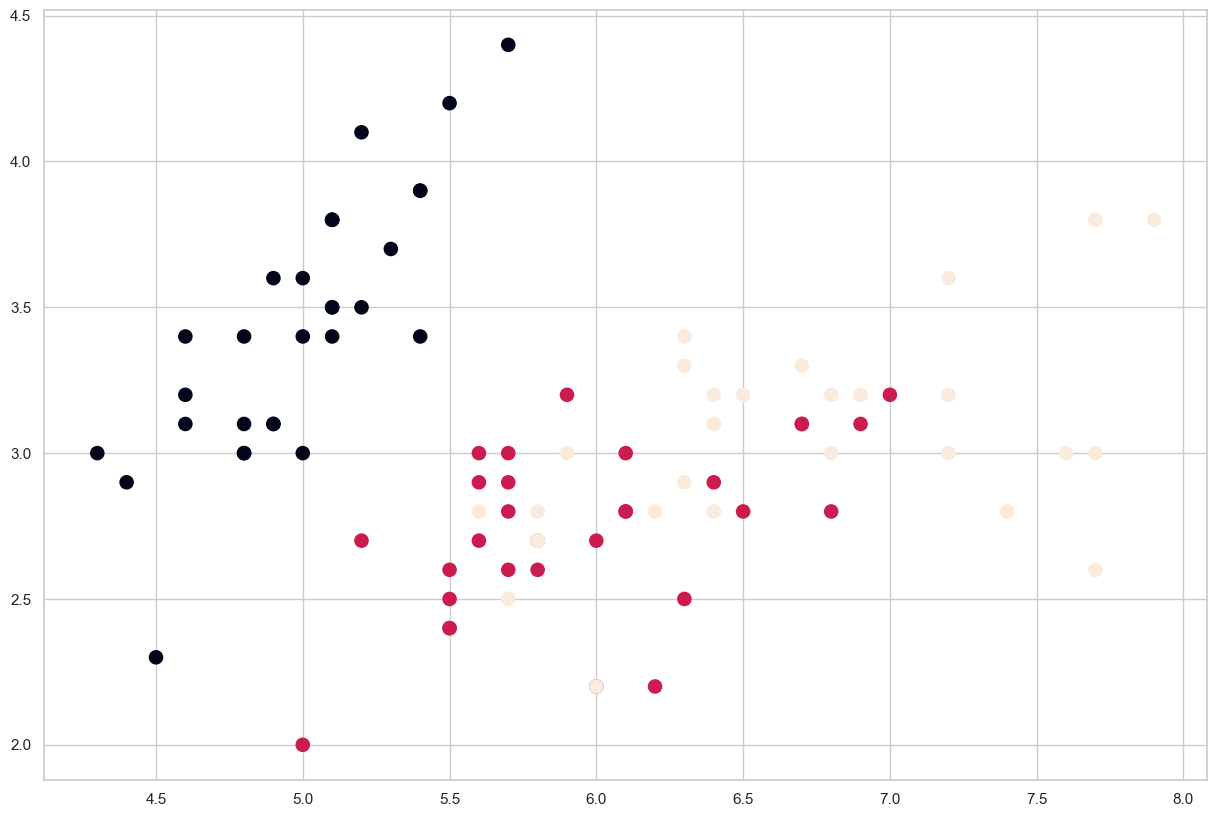

In [31]:
# Plotte Trainingsdaten
# Im Buch Abbildung 2-1
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

plt.scatter(X_train_sepal_only.iloc[:, 0],  X_train_sepal_only.iloc[:, 1], s=90,  c=y_train)

# plt.savefig('ML_0201.png', bbox_inches='tight')

Scores sind gut für die Trainingsdaten, aber nicht so toll für Testdaten

In [32]:
# Score für Trainingsdaten
clf_sepal.score(X_train_sepal_only, y_train)

0.9444444444444444

In [33]:
# Score für Testdaten
clf_sepal.score(X_test_sepal_only, y_test)

0.8

Das sieht nach Overfittung aus, das siehst du auch beim Plotting der Deciscion Boundaries

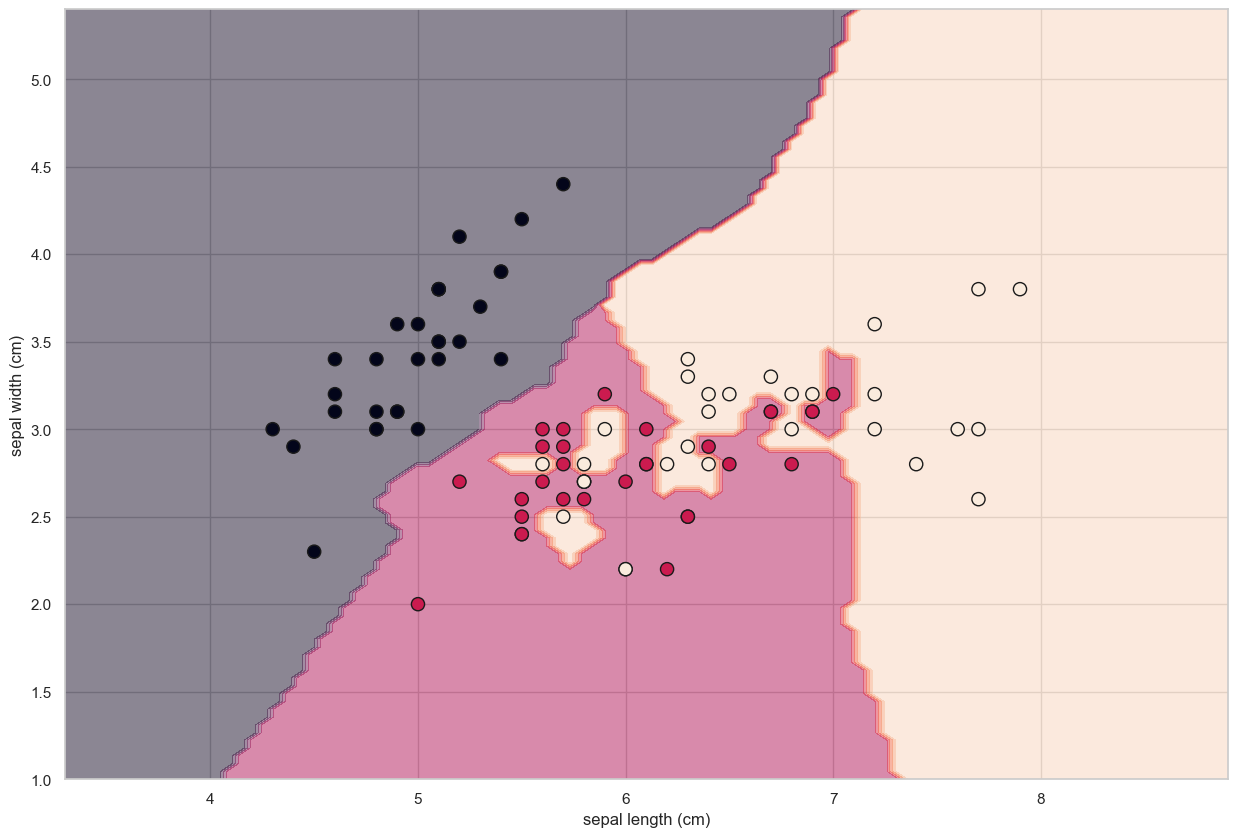

In [34]:
# Plotte Trainingsdaten und Entscheidungsgrenze
# im Buch Abbildung 2-2
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

disp = DecisionBoundaryDisplay.from_estimator(clf_sepal, X_train_sepal_only, plot_method="contourf", alpha=0.5)

disp.ax_.scatter(X_train_sepal_only.iloc[:, 0], X_train_sepal_only.iloc[:, 1], c=y_train, edgecolor="k", s=90)

disp.figure_.set_size_inches((15,10))

# plt.savefig('ML_0202.png', bbox_inches='tight')

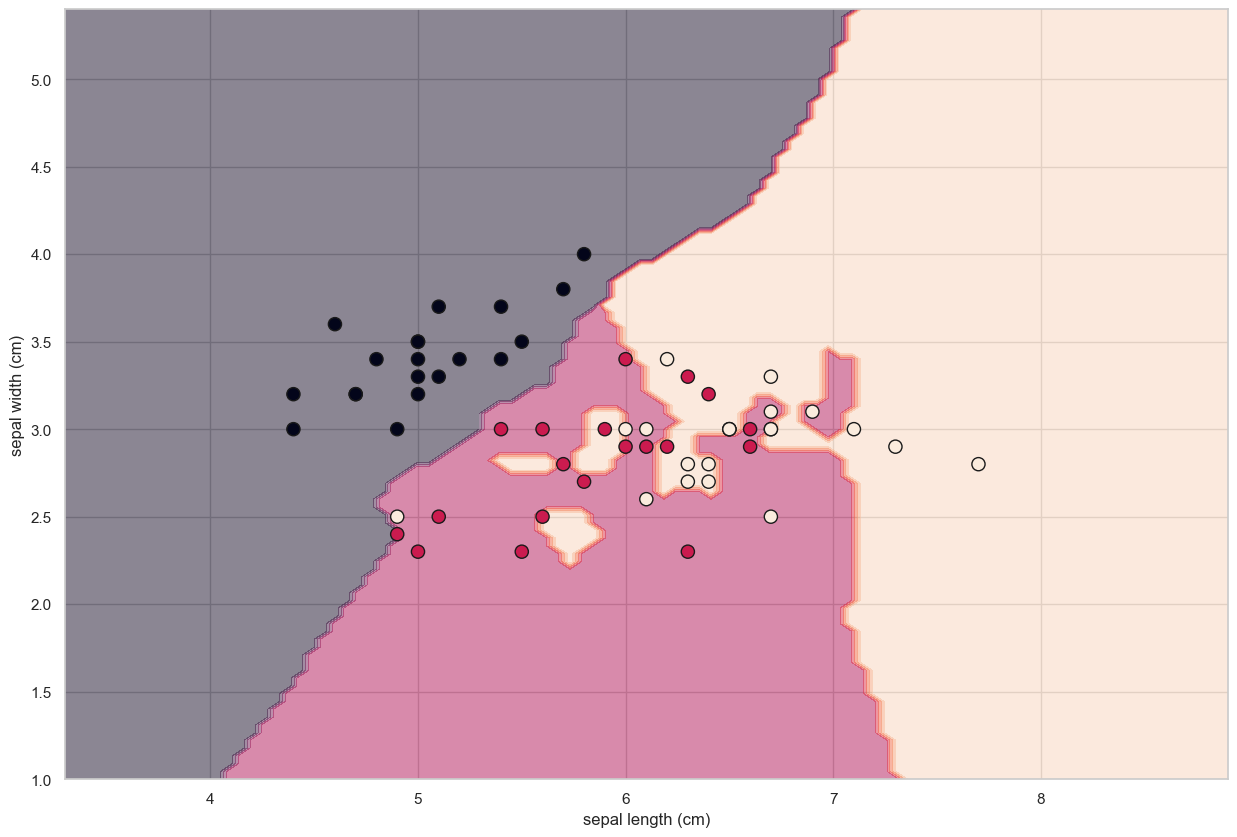

In [35]:
# Plotte Testdaten und Entscheidungsgrenze
# Im Buch Abbildung 2-3
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

disp = DecisionBoundaryDisplay.from_estimator(clf_sepal, X_train_sepal_only, plot_method="contourf", alpha=0.5)

disp.ax_.scatter(X_test_sepal_only.iloc[:, 0], X_test_sepal_only.iloc[:, 1], c=y_test, edgecolor="k", s=90)

disp.figure_.set_size_inches((15,10))

# plt.savefig('ML_0203.png', bbox_inches='tight')

## Underfitting

Wir machen das Modell weniger komplex, allgemeiner

In [36]:
# Trainiere Klassifier mit 10 Nachbarn
clf_sepal_10 = neighbors.KNeighborsClassifier(10)
clf_sepal_10.fit(X_train_sepal_only, y_train)

KNeighborsClassifier(n_neighbors=10)

In [37]:
# Score für Trainingsdaten
clf_sepal_10.score(X_train_sepal_only, y_train)

0.7777777777777778

In [38]:
# Score für Testdaten
clf_sepal_10.score(X_test_sepal_only, y_test)

0.7666666666666667

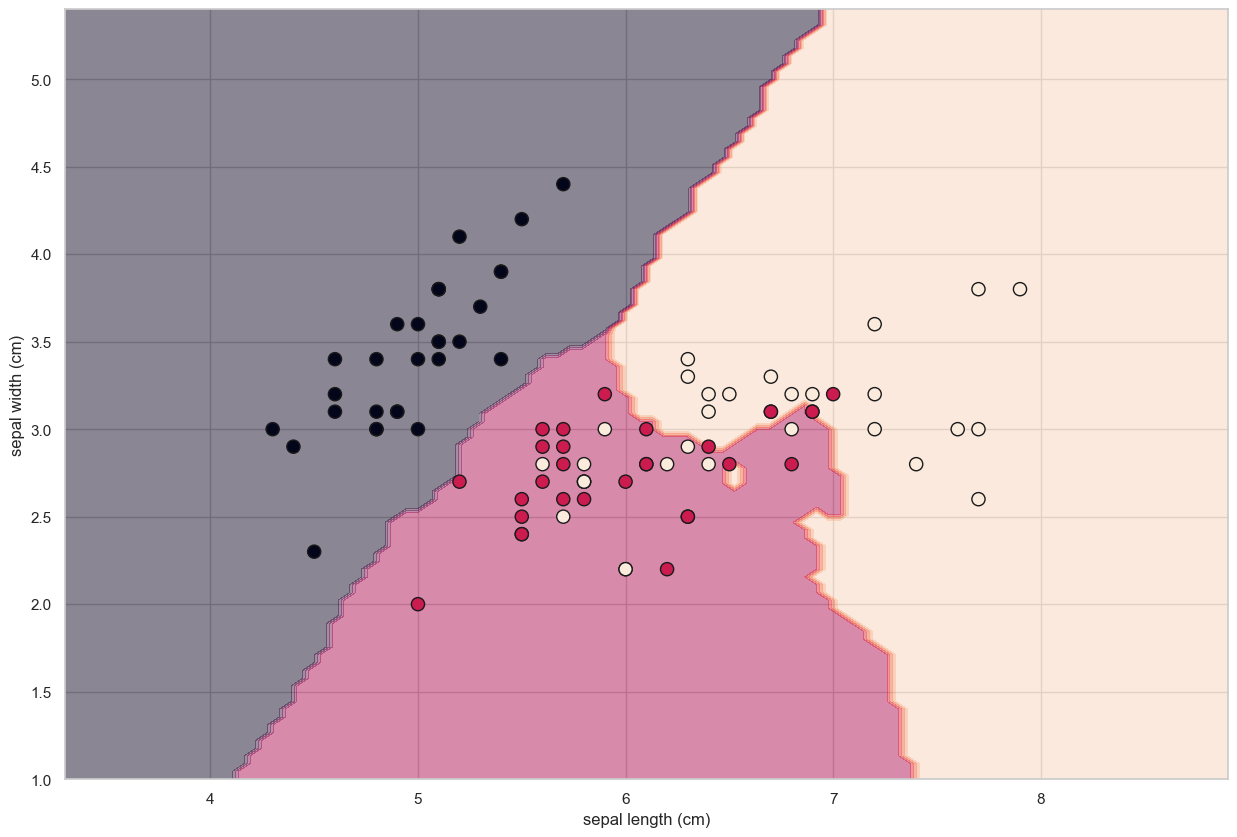

In [39]:
# Plotte Trainingsdaten und Entscheidungsgrenze
# Im Buch Abbildung 2-4
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

disp = DecisionBoundaryDisplay.from_estimator(clf_sepal_10, X_train_sepal_only, plot_method="contourf", alpha=0.5)

disp.ax_.scatter(X_train_sepal_only.iloc[:, 0], X_train_sepal_only.iloc[:, 1], c=y_train, edgecolor="k", s=90)

disp.figure_.set_size_inches((15,10))

# plt.savefig('ML_0204.png', bbox_inches='tight')

Mit den Sepal Features werden wir immer entweder overfitten oder underfitten

Wir versuchen es noch einmal mit den Petal Features

## Eine bessere Feature-Auswahl

In [40]:
# Lege neue Trainings- und Testdaten an mit ausschließlich petal-Feature
X_train_petal_only = X_train.filter(like="petal")
X_test_petal_only = X_test.filter(like="petal")

In [41]:
# Trainiere neuen Klassifier mit 10 Nachbarn auf Trainingsdaten
clf_petal_10 = neighbors.KNeighborsClassifier(10)
clf_petal_10.fit(X_train_petal_only, y_train)

KNeighborsClassifier(n_neighbors=10)

In [42]:
# Score für Trainingsdaten
clf_petal_10.score(X_train_petal_only, y_train)

0.9666666666666667

In [43]:
# Score für Testdaten
clf_petal_10.score(X_test_petal_only, y_test)

0.95

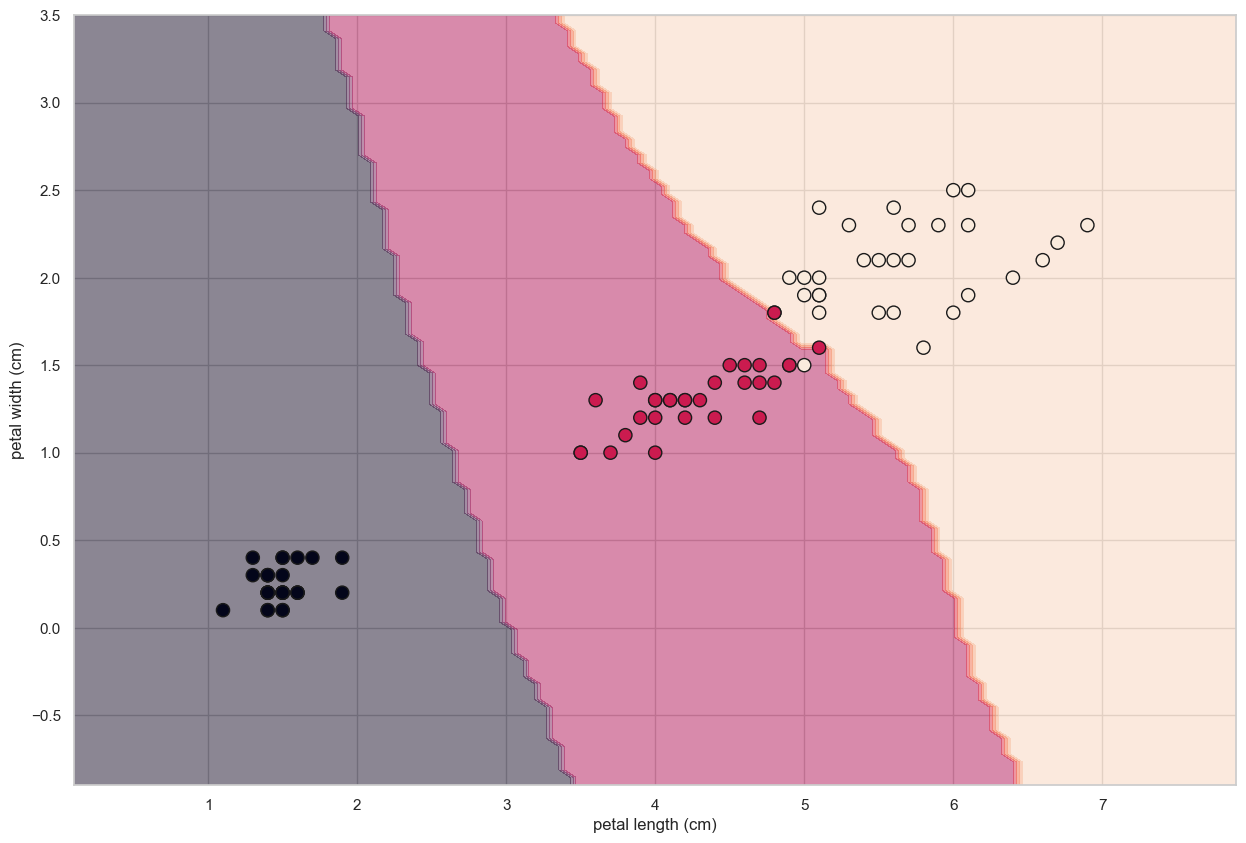

In [44]:
# Plotte Trainingsdaten und Entscheidungsgrenze
# Im Buch Abbildung 2-5
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

disp = DecisionBoundaryDisplay.from_estimator(clf_petal_10, X_train_petal_only, plot_method="contourf", alpha=0.5)

disp.ax_.scatter(X_train_petal_only.iloc[:, 0], X_train_petal_only.iloc[:, 1], c=y_train, edgecolor="k", s=90)

disp.figure_.set_size_inches((15,10))

# plt.savefig('ML_0205.png', bbox_inches='tight')

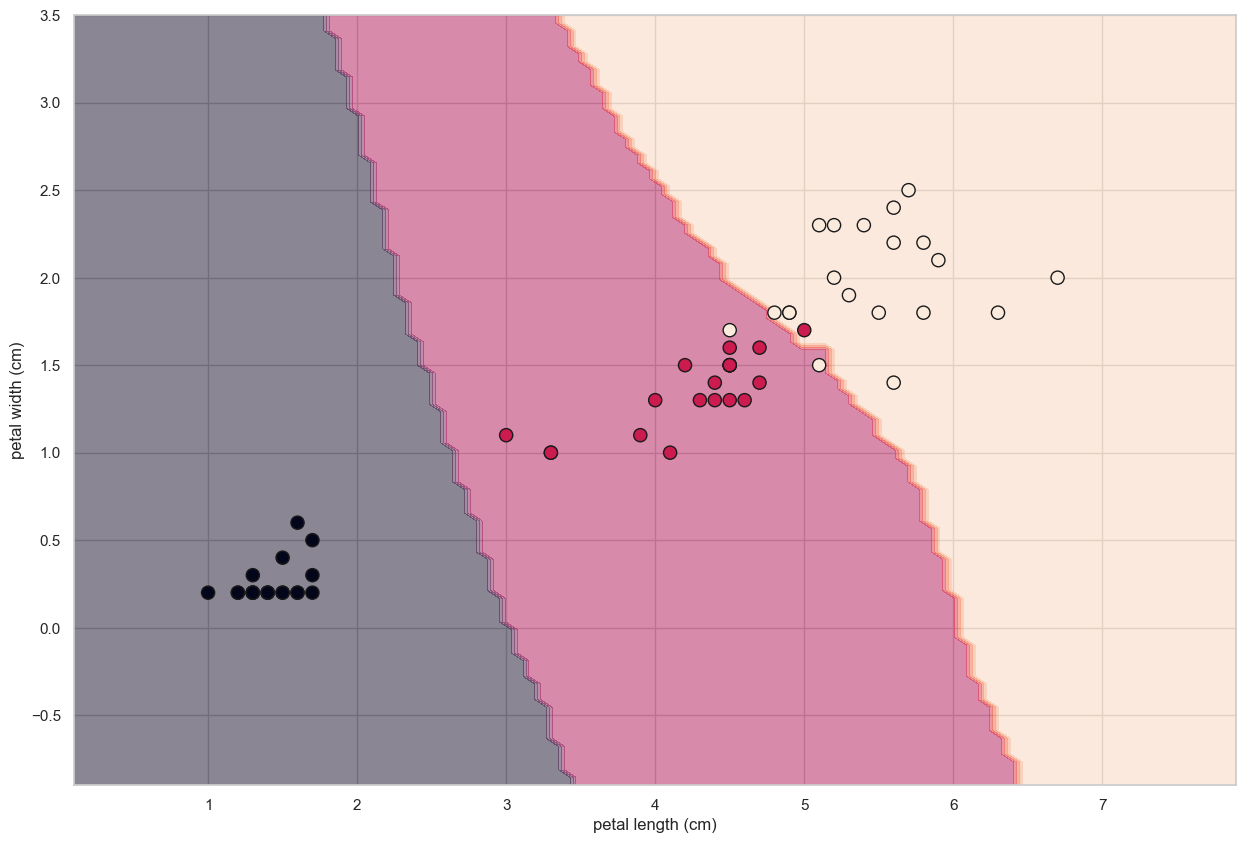

In [45]:
# Plotte Testdaten und Entscheidungsgrenze
# Im Buch Abbildung 2-6
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

disp = DecisionBoundaryDisplay.from_estimator(clf_petal_10, X_train_petal_only, plot_method="contourf", alpha=0.5)

disp.ax_.scatter(X_test_petal_only.iloc[:, 0], X_test_petal_only.iloc[:, 1], c=y_test, edgecolor="k", s=90)

disp.figure_.set_size_inches((15,10))

# plt.savefig('ML_0206.png', bbox_inches='tight')

Ein deutlich besseres Ergebnis, obwohl wir wieder nur 2 Features genommen haben. Es kann also entscheident sein, welche Features man nimmt.